بسم الله

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate

# إعدادات العرض
sns.set(style='whitegrid', palette='muted', color_codes=True)

# النمذجة التنبؤية
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# تثبيت العشوائية
import random
random.seed(42)
np.random.seed(42)

# مكتبة الإحصاء والتحذيرات
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
# محاولة القراءة بترميز مختلفر

In [2]:
gold = pd.read_csv("/kaggle/input/gold-silver-price-vs-geopolitical-risk-19852025/All_Historical_Data_Separately/Gold Spot Price Daily.csv")
silver = pd.read_csv("/kaggle/input/gold-silver-price-vs-geopolitical-risk-19852025/All_Historical_Data_Separately/Silver Spot Price Daily.csv")
gprd = pd.read_csv("/kaggle/input/gold-silver-price-vs-geopolitical-risk-19852025/All_Historical_Data_Separately/Geopolitical Risk Index Daily.csv")

In [3]:
gold["DATE"] = pd.to_datetime(gold["DATE"], dayfirst=True)
silver["DATE"] = pd.to_datetime(silver["DATE"], dayfirst=True)
gprd["DATE"] = pd.to_datetime(gprd["DATE"], dayfirst=True)

In [4]:
merged = gold.merge(silver, on="DATE", how="left") \
             .merge(gprd, on="DATE", how="left")

In [5]:
merged["DATE"] = merged["DATE"].dt.date


In [6]:
for col in merged.columns:
    if col not in ["DATE", "EVENT"]:
        if pd.api.types.is_numeric_dtype(merged[col]):
            merged[col] = merged[col].round(2)

In [7]:
merged.to_csv("Gold-Silver-GeopoliticalRisk_HistoricalData.csv", index=False)


In [8]:
merged.head()

,DATE,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT,EVENT
0,2025-09-10,3630.90,3633.61,3634.42,3620.90,-0.07,40.92,40.89,40.94,40.72,0.09,NaN,NaN,NaN,NaN
1,2025-09-09,3633.61,3637.10,3674.75,3625.33,-0.06,40.89,41.34,41.50,40.77,-1.13,NaN,NaN,NaN,NaN
2,2025-09-08,3635.84,3586.82,3646.60,3579.67,1.24,41.36,41.01,41.68,40.51,1.20,117.26,97.42,146.26,NaN
3,2025-09-07,3591.19,3592.07,3596.56,3586.95,0.12,40.86,41.00,41.01,40.76,-0.34,83.51,111.00,92.59,NaN
4,2025-09-05,3586.81,3547.00,3600.33,3540.05,1.15,41.01,40.69,41.44,40.55,0.76,166.42,110.61,224.05,NaN


In [9]:
df=merged

In [10]:
df.head()

,DATE,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT,EVENT
0,2025-09-10,3630.90,3633.61,3634.42,3620.90,-0.07,40.92,40.89,40.94,40.72,0.09,NaN,NaN,NaN,NaN
1,2025-09-09,3633.61,3637.10,3674.75,3625.33,-0.06,40.89,41.34,41.50,40.77,-1.13,NaN,NaN,NaN,NaN
2,2025-09-08,3635.84,3586.82,3646.60,3579.67,1.24,41.36,41.01,41.68,40.51,1.20,117.26,97.42,146.26,NaN
3,2025-09-07,3591.19,3592.07,3596.56,3586.95,0.12,40.86,41.00,41.01,40.76,-0.34,83.51,111.00,92.59,NaN
4,2025-09-05,3586.81,3547.00,3600.33,3540.05,1.15,41.01,40.69,41.44,40.55,0.76,166.42,110.61,224.05,NaN


In [11]:
df.tail()


,DATE,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT,EVENT
10566,1985-01-08,302.0,302.0,302.0,302.0,1.27,6.01,6.01,6.01,6.01,3.62,87.40,34.85,130.82,NaN
10567,1985-01-07,298.2,298.2,298.2,298.2,-1.62,5.80,5.80,5.80,5.80,-3.81,105.31,57.27,143.30,NaN
10568,1985-01-04,303.1,303.1,303.1,303.1,0.26,6.03,6.03,6.03,6.03,-0.99,157.37,156.88,157.03,NaN
10569,1985-01-03,302.3,302.3,302.3,302.3,-1.05,6.09,6.09,6.09,6.09,-0.98,97.43,158.94,29.46,NaN
10570,1985-01-02,305.5,305.5,305.5,305.5,-0.91,6.15,6.15,6.15,6.15,-3.30,115.68,146.77,87.44,NaN


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10571 entries, 0 to 10570
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             10571 non-null  object 
 1   GOLD_PRICE       10571 non-null  float64
 2   GOLD_OPEN        10571 non-null  float64
 3   GOLD_HIGH        10571 non-null  float64
 4   GOLD_LOW         10571 non-null  float64
 5   GOLD_CHANGE_%    10571 non-null  float64
 6   SILVER_PRICE     10564 non-null  float64
 7   SILVER_OPEN      10564 non-null  float64
 8   SILVER_HIGH      10564 non-null  float64
 9   SILVER_LOW       10564 non-null  float64
 10  SILVER_CHANGE_%  10564 non-null  float64
 11  GPRD             10569 non-null  object 
 12  GPRD_ACT         10569 non-null  object 
 13  GPRD_THREAT      10569 non-null  float64
 14  EVENT            11 non-null     object 
dtypes: float64(11), object(4)
memory usage: 1.2+ MB


In [13]:
df.dtypes


DATE                object
GOLD_PRICE         float64
GOLD_OPEN          float64
GOLD_HIGH          float64
GOLD_LOW           float64
GOLD_CHANGE_%      float64
SILVER_PRICE       float64
SILVER_OPEN        float64
SILVER_HIGH        float64
SILVER_LOW         float64
SILVER_CHANGE_%    float64
GPRD                object
GPRD_ACT            object
GPRD_THREAT        float64
EVENT               object
dtype: object

In [14]:
df.describe()


,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD_THREAT
count,10571.000000,10571.000000,10571.000000,10571.000000,10571.000000,10564.000000,10564.000000,10564.000000,10564.000000,10564.000000,10569.000000
mean,887.276856,887.412518,892.378187,881.901980,0.028118,12.825364,12.810967,12.967795,12.664810,0.033753,113.966142
std,666.189751,665.535068,671.811142,659.998671,0.976355,9.189963,9.184530,9.353250,9.010104,1.734102,65.015038
min,252.550000,252.350000,252.550000,252.550000,-8.490000,3.540000,3.530000,3.540000,3.530000,-20.540000,0.000000
25%,361.075000,362.150000,361.075000,361.075000,-0.430000,5.130000,5.130000,5.130000,5.130000,-0.750000,72.120000
50%,462.350000,464.620000,462.350000,462.350000,0.010000,7.635000,7.620000,7.635000,7.630000,0.000000,100.620000
75%,1312.045000,1312.345000,1320.130000,1305.395000,0.500000,18.140000,18.130000,18.395000,17.910000,0.880000,139.720000
max,3635.840000,3637.100000,3674.750000,3625.330000,11.000000,48.450000,48.420000,49.550000,47.520000,14.870000,809.490000


In [15]:
df.isnull().sum()


DATE                   0
GOLD_PRICE             0
GOLD_OPEN              0
GOLD_HIGH              0
GOLD_LOW               0
GOLD_CHANGE_%          0
SILVER_PRICE           7
SILVER_OPEN            7
SILVER_HIGH            7
SILVER_LOW             7
SILVER_CHANGE_%        7
GPRD                   2
GPRD_ACT               2
GPRD_THREAT            2
EVENT              10560
dtype: int64

<Axes: >

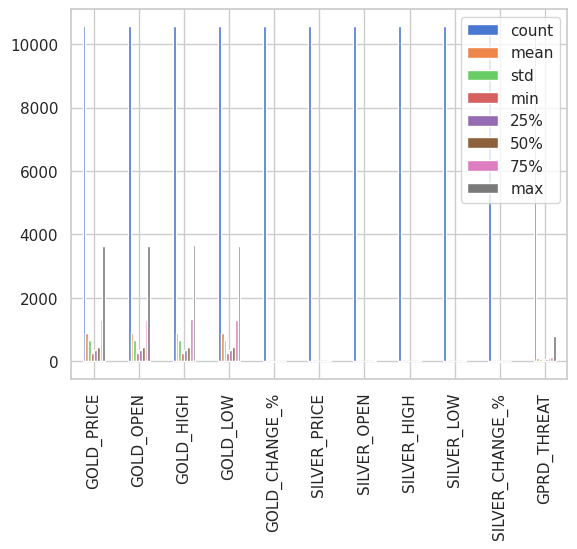

In [16]:
df.describe().T.plot(kind='bar')


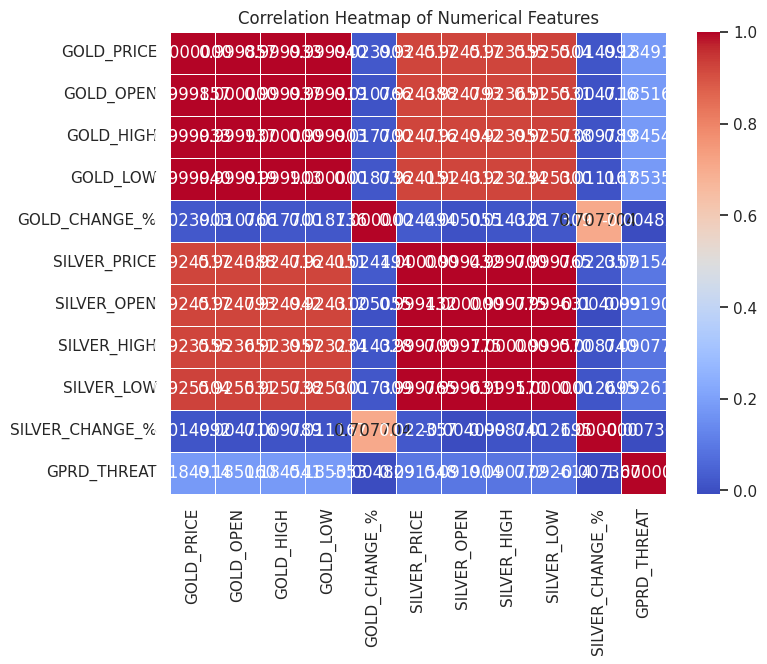

In [17]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

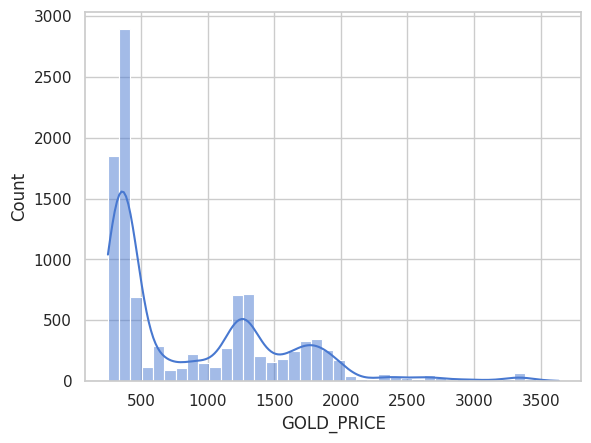

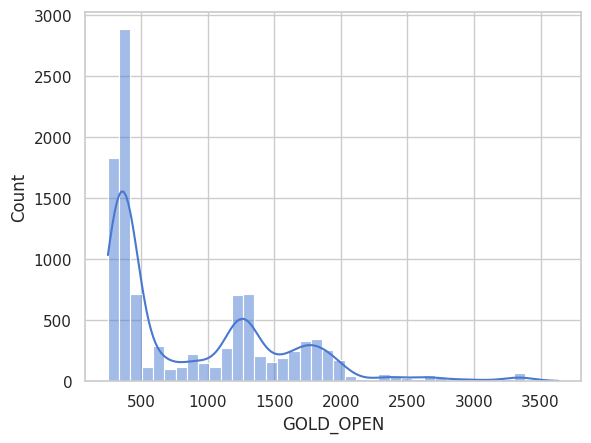

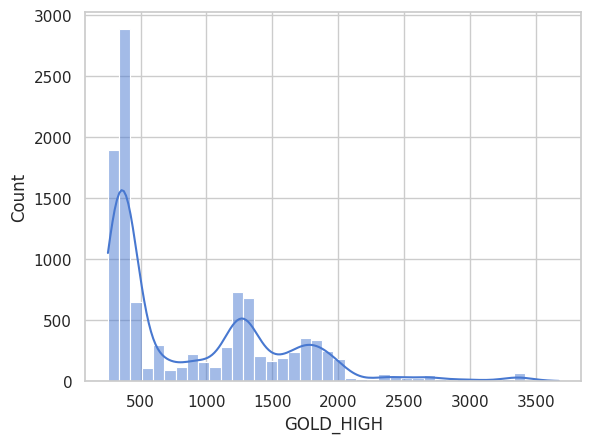

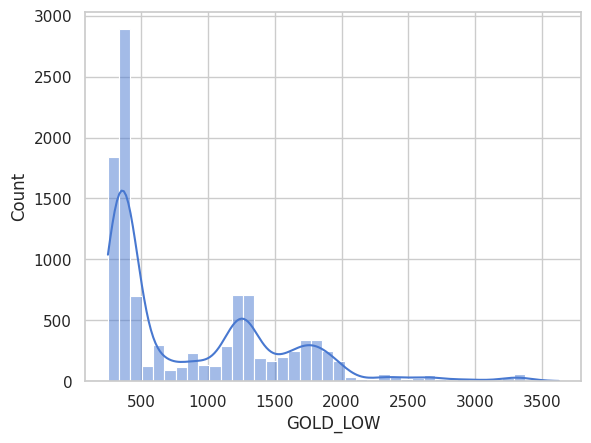

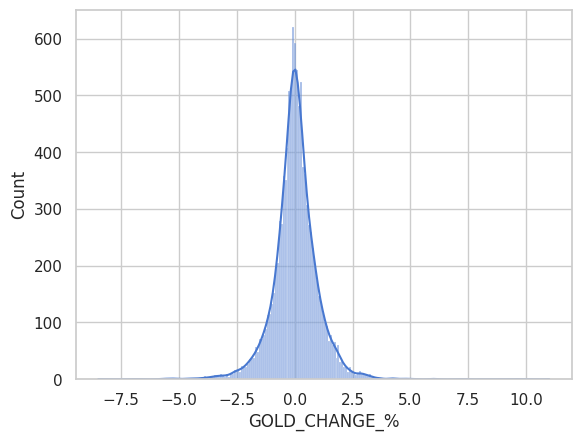

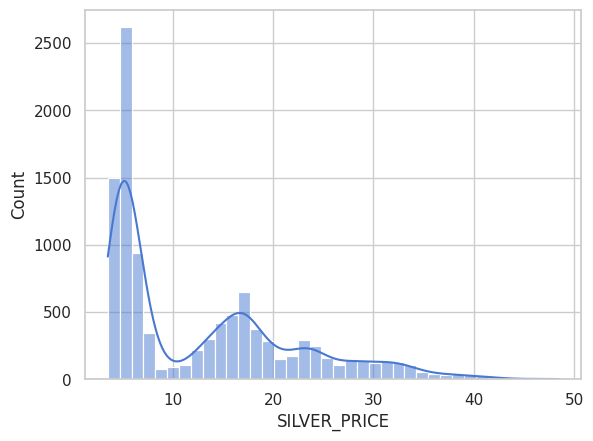

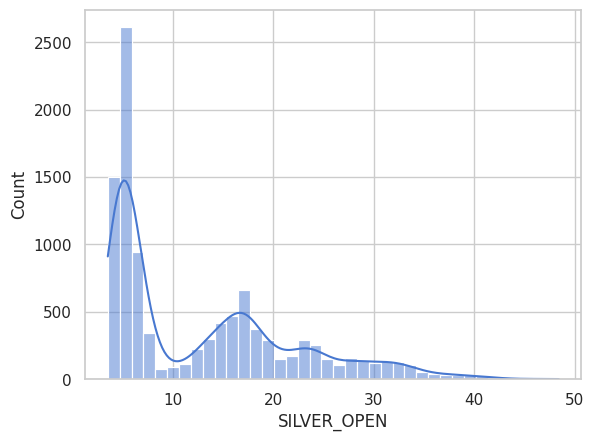

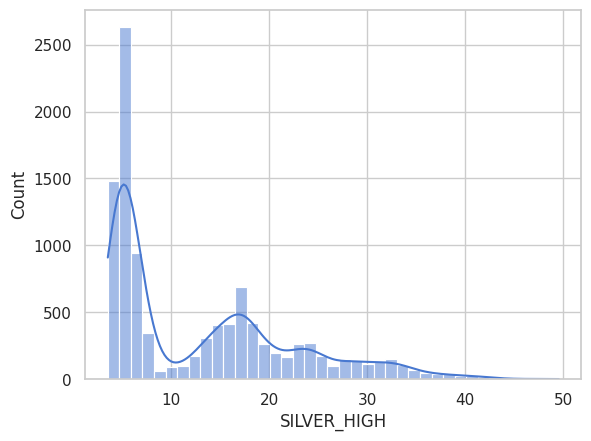

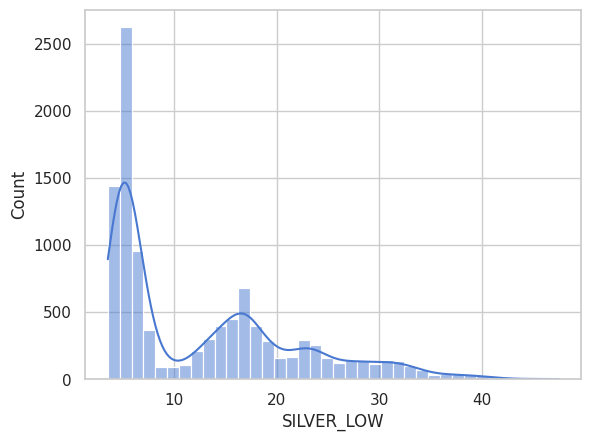

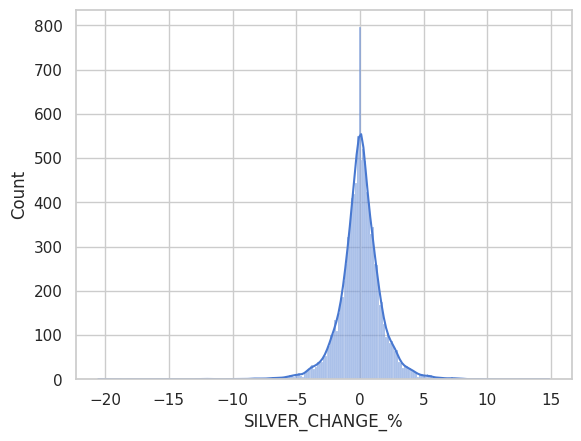

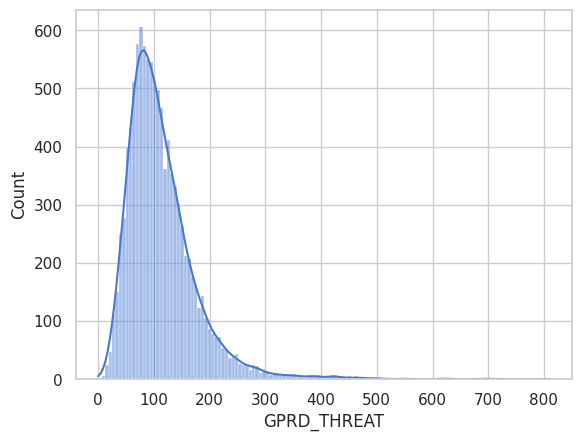

In [18]:
numeric_cols = df.select_dtypes(include=['number']).columns

# رسم التوزيع لكل عمود رقمي
for col in numeric_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

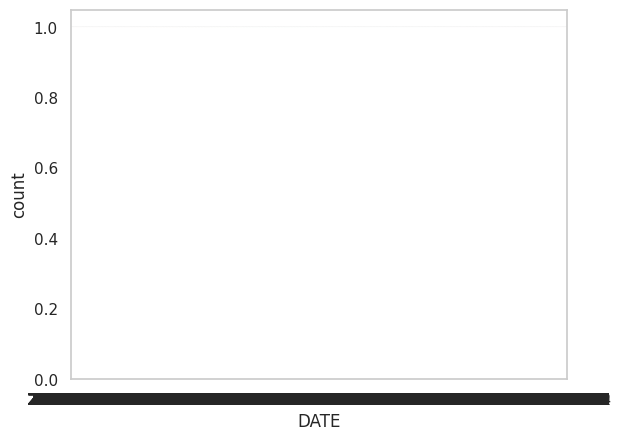

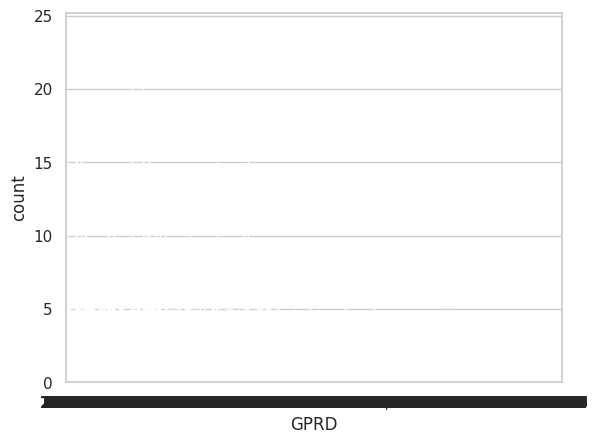

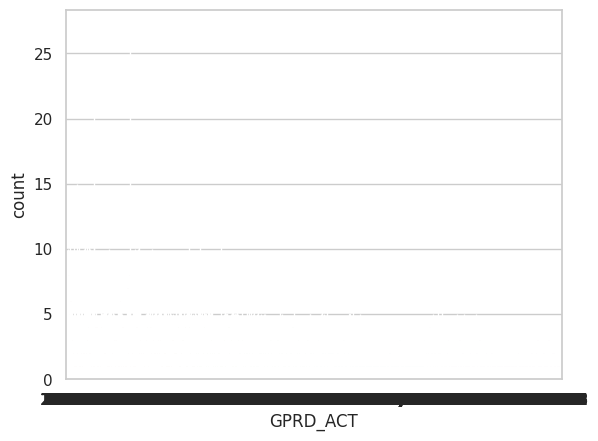

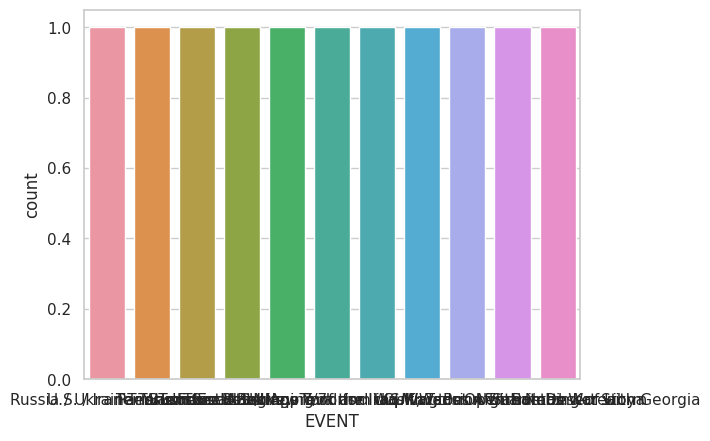

In [19]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()